<a href="https://colab.research.google.com/github/IzhanAli08/Machine-Learning-Projects/blob/main/CarPricePredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction using Regression

In this project, the goal is to predict car prices based on inputs/specifications of a car. For example, the model that we build, should be able to correctly tell the price of a car if provided with model, make, year, mileage, and other important characteristics of a car. This is an important problem for many car resale businesses.

For any problem that requires the prediction of a continuous value, we use something known as regression. I read about regression here:

[Linear Regression](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)

Before starting with the project, make sure you understand the idea of linear regression.

### Project Plan

The plan for the project is the following:

1 First, we download the dataset.

2 Next, we do some preliminary analysis of the data. This is called Exploratory data analysis(EDA).

3 After that, we set up a validation strategy to make sure our model produces correct
predictions. This involves testing model performance on unknown data points.

4 Then we implement a linear regression model in Python and NumPy.

5 Next, we cover feature engineering to extract important features from the data
to improve the model.

6 Finally, we see how to make our model stable with regularization and use it to
predict car prices.

#### References

Machine learning Bootcamp (Grigov)

https://numpy.org/



Link to the dataset:
[https://www.kaggle.com/datasets/CooperUnion/cardataset]

We look at the dataset to learn
1. The distribution of the target variable
2. The features in this dataset
3. The distribution of values in these features
4.  The quality of the data
5. The number of missing values

Before you jump into the EDA (Exploratory data analysis), read more about numpy and pandas. These are 2 essential libraries in python when working with data.

In [1]:
# Read the data and perform exploratory data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [5]:
#Create a pandas dataframe
df=pd.read_csv('drive/MyDrive/data.csv')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Here MSRP is the column, we will be predicting(also called the target variable) by using the information provided in all other columns(features).

In [7]:
#number of records
len(df)

11914

In [8]:
#Number of rows and columns
df.shape

(11914, 16)

While working with any dataset, we should have convenient column names because those will be used again and again. The first step needed is to make them consistent. Maybe we can make all of them lowercase and remove all spaces.

In [9]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can do the same for all values in every column.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
# We will target only the columns that are object types
st_cols=list(df.dtypes[df.dtypes=='object'].index)

In [12]:
# str is used for making changes to the entire columns
for col in st_cols:
  df[col]=df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<Axes: xlabel='msrp', ylabel='Count'>

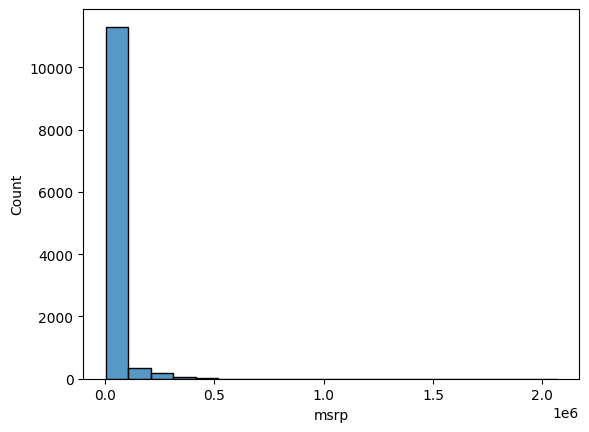

In [14]:
#Check the target variable
sns.histplot(df.msrp,bins=20)

The distribution of prices has a long tail, meaning there are fewer cars with higher prices.

<Axes: xlabel='msrp', ylabel='Count'>

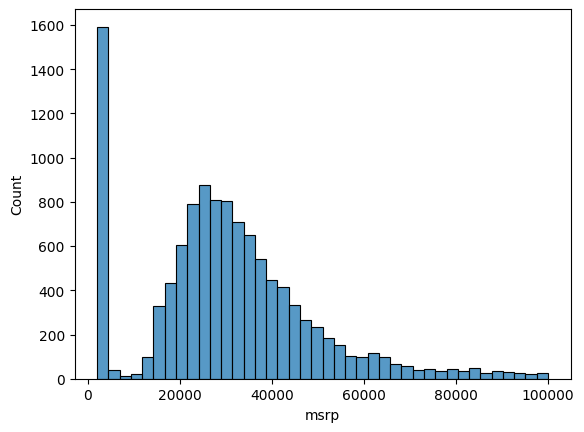

In [15]:
sns.histplot(df.msrp[df.msrp<100000],bins=40)

The distribution of the prices for cars below $100,000.

Looking  only at car

prices below $100,000 allows us to see the head of the

distribution better. We also notice

a lot of cars that cost $1,000.

<Axes: xlabel='msrp', ylabel='Count'>

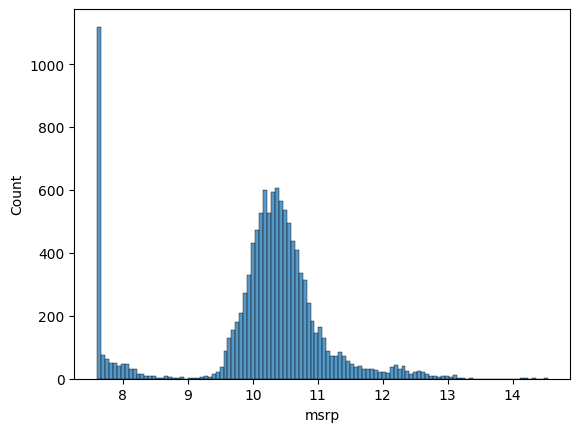

In [16]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)

The log transformation removes the long tail, and now the distribution resembles
a bell-shaped curve. This distribution is not normal, of course, because of the
large peak in lower prices, but the model can deal with it more easily.

In [17]:
#Checking for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Market category is has a lot of values missing. We can either drop or fill it with default values later.

## Build the model

1. Train, validation, test split.
2. Train model on training set
3. Check validation error
4. Test on the test set

In [18]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [19]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [20]:
#applying log transform to each dataframe separately
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [21]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

After performing the initial data analysis, we are ready to train a model. The problem
we are solving is a regression problem: the goal is to predict a number — the price of
a car. For this project we will use the simplest regression model: linear regression.

We will be implementing this from scratch instead of using any packages first.